Apply KMeans clustering on the Employee_income.xlsx dataset and identify exact clusters using Elbow method to model the algorithm



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [2]:
df = pd.read_excel('Employee_income.xlsx')
df.head()

,Name,Age,Income
0,Amit,27,70000
1,Akash,29,90000
2,Shriya,29,61000
3,Anita,28,62000
4,Sudhir,42,155000


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income'}>]], dtype=object)

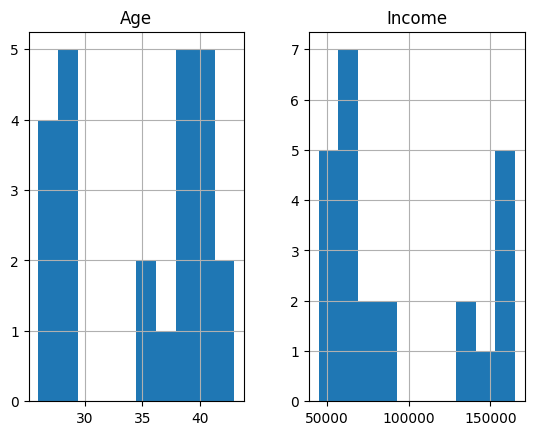

In [3]:
df.hist()

In [4]:
df.describe()

,Age,Income
count,24.000000,24.000000
mean,34.916667,92104.166667
std,5.933814,44673.204489
min,26.000000,45000.000000
25%,28.750000,58000.000000
50%,37.500000,67000.000000
75%,40.000000,139000.000000
max,43.000000,165000.000000


In [5]:
X = df[['Age','Income']]
X[:3]

,Age,Income
0,27,70000
1,29,90000
2,29,61000


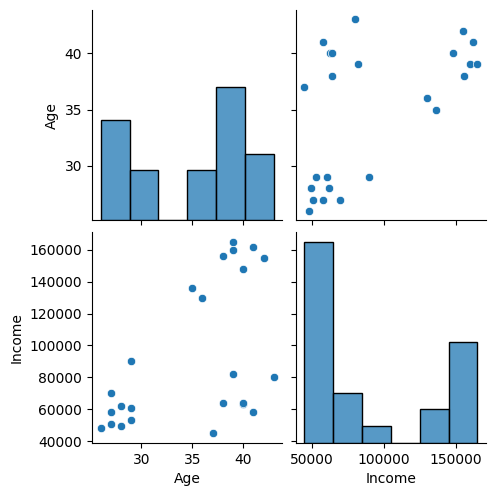

In [6]:
import seaborn as sns
sns.pairplot(X)

<Axes: xlabel='Age', ylabel='Income'>

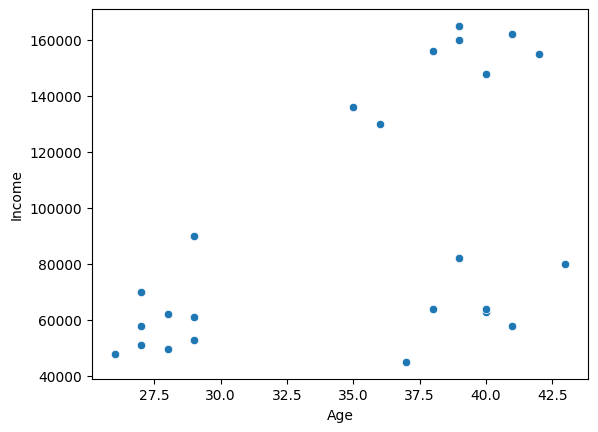

In [7]:
sns.scatterplot(x='Age',y='Income',data=df)

In [8]:
model = KMeans(n_clusters=3)
model

KMeans(n_clusters=3)

In [9]:
model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [10]:
X[:3]

,Age,Income
0,27,70000
1,29,90000
2,29,61000


In [11]:
len(X)

24

In [12]:
model.labels_

array([1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 1, 1, 2, 2,
       2, 0], dtype=int32)

In [13]:
np.unique(model.labels_)

array([0, 1, 2], dtype=int32)

In [14]:
model.predict(X)

array([1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 1, 1, 2, 2,
       2, 0], dtype=int32)

In [15]:
model.cluster_centers_

array([[3.8750e+01, 1.5150e+05],
       [3.4500e+01, 8.0500e+04],
       [3.2500e+01, 5.6375e+04]])

In [16]:
X[:2]

,Age,Income
0,27,70000
1,29,90000


In [17]:
model.cluster_centers_[:,0]

array([38.75, 34.5 , 32.5 ])

In [18]:
model.cluster_centers_[:,1]

array([151500.,  80500.,  56375.])

Text(0, 0.5, 'Income')

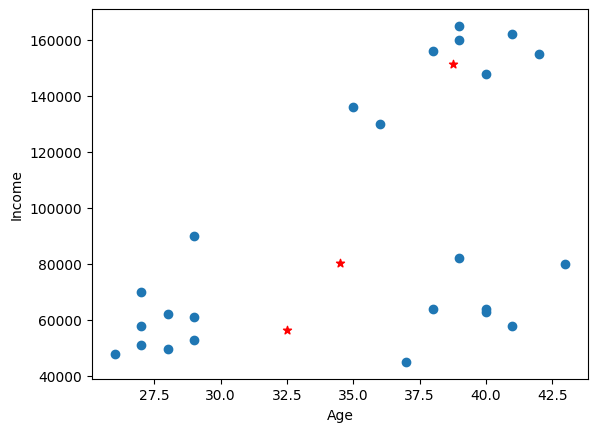

In [19]:
plt.scatter(X.Age,X.Income)
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='red',marker='*')
plt.xlabel('Age')
plt.ylabel('Income')

In [20]:
X[:2]

,Age,Income
0,27,70000
1,29,90000


In [21]:
model.predict(X)

array([1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 1, 1, 2, 2,
       2, 0], dtype=int32)

In [22]:
X['cluster']=model.predict(X)

In [23]:
X

,Age,Income,cluster
0,27,70000,1
1,29,90000,1
2,29,61000,2
3,28,62000,2
4,42,155000,0
5,39,160000,0
6,41,162000,0
7,38,156000,0
8,36,130000,0
9,35,136000,0


In [24]:
X.shape

(24, 3)

In [25]:
X.cluster.unique()

array([1, 2, 0], dtype=int32)

In [26]:
X[X['cluster']==0]

,Age,Income,cluster
4,42,155000,0
5,39,160000,0
6,41,162000,0
7,38,156000,0
8,36,130000,0
9,35,136000,0
15,39,165000,0
23,40,148000,0


In [27]:
df1 = X[X['cluster']==0]
df2 = X[X['cluster']==1]
df3 = X[X['cluster']==2]


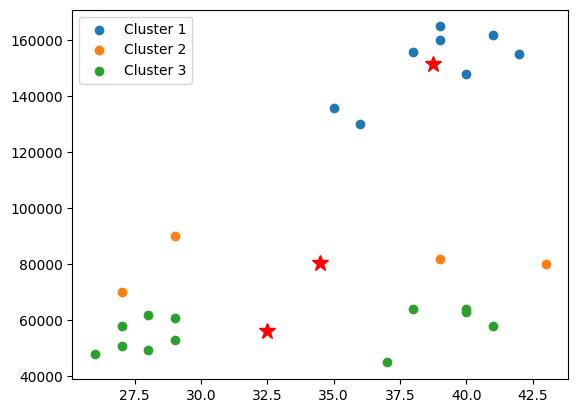

In [28]:
plt.scatter(df1['Age'],df1['Income'],label='Cluster 1')
plt.scatter(df2['Age'],df2['Income'],label='Cluster 2')
plt.scatter(df3['Age'],df3['Income'],label='Cluster 3')

plt.plot(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='red',marker='*',markersize=12,linestyle=' ')
plt.legend()


In [29]:
#Scaling is required for age and Income also
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Income'] = scaler.fit_transform(df[['Income']])

df['Age'] = scaler.fit_transform(df[['Age']])


In [30]:
df[:3]

,Name,Age,Income
0,Amit,0.058824,0.208333
1,Akash,0.176471,0.375000
2,Shriya,0.176471,0.133333


In [31]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [32]:
df[['Age','Income']].head(2)

,Age,Income
0,0.058824,0.208333
1,0.176471,0.375000


In [33]:
df.describe()

,Age,Income
count,24.000000,24.000000
mean,0.524510,0.392535
std,0.349048,0.372277
min,0.000000,0.000000
25%,0.161765,0.108333
50%,0.676471,0.183333
75%,0.823529,0.783333
max,1.000000,1.000000


In [34]:
y_pred = km.fit_predict(df[['Age','Income']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [35]:
km.labels_

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1,
       0, 2], dtype=int32)

In [36]:
df[:2]

,Name,Age,Income
0,Amit,0.058824,0.208333
1,Akash,0.176471,0.375000


In [37]:
df['Cluster']= y_pred

In [38]:
df[:3]

,Name,Age,Income,Cluster
0,Amit,0.058824,0.208333,0
1,Akash,0.176471,0.375000,0
2,Shriya,0.176471,0.133333,0


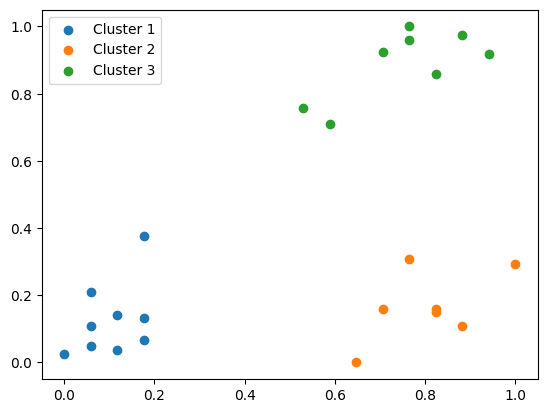

In [39]:
df1 = df[df['Cluster']==0]
df2 = df[df['Cluster']==1]
df3 = df[df['Cluster']==2]


plt.scatter(df1['Age'],df1['Income'],label='Cluster 1')
plt.scatter(df2['Age'],df2['Income'],label='Cluster 2')
plt.scatter(df3['Age'],df3['Income'],label='Cluster 3')
plt.legend()

In [40]:
km.cluster_centers_

array([[0.10457516, 0.12731481],
       [0.80672269, 0.16785714],
       [0.75      , 0.8875    ]])

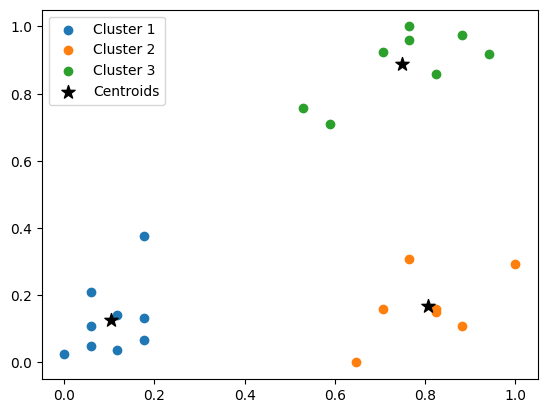

In [41]:
plt.scatter(df1['Age'],df1['Income'],label='Cluster 1')
plt.scatter(df2['Age'],df2['Income'],label='Cluster 2')
plt.scatter(df3['Age'],df3['Income'],label='Cluster 3')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=100,marker='*',color='black',label='Centroids')

plt.legend()

In [42]:
km.inertia_

0.4920193431403063

In [44]:
X = df[['Age','Income']]
X.head()

,Age,Income
0,0.058824,0.208333
1,0.176471,0.375000
2,0.176471,0.133333
3,0.117647,0.141667
4,0.941176,0.916667


In [47]:
wcss = []
for i in range(1,11):
  km = KMeans(n_clusters=i)
  km.fit(X)
  print('Cluster : ',i,km.inertia_)


Cluster :  1 5.989760185886038
Cluster :  2 2.3729014553125167
Cluster :  3 0.4920193431403063
Cluster :  4 0.3311771990931449
Cluster :  5 0.2563456831364082
Cluster :  6 0.19373235103886327
Cluster :  7 0.14937818437219663
Cluster :  8 0.11815685924083683
Cluster :  9 0.09379987364635395
Cluster :  10 0.07179492763200049


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [48]:
wcss = []
for i in range(1,11):#i will take 1 to 10 cluster
    km = KMeans(n_clusters=i)
    km.fit(X)
    #print('Cluster:',i,km.inertia_)
    wcss.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [49]:
print(wcss)

[5.989760185886038, 2.3729014553125167, 0.4920193431403063, 0.3311771990931449, 0.2563456831364082, 0.19487994651496227, 0.14937818437219663, 0.11815685924083683, 0.09569260220428039, 0.0705726413318595]


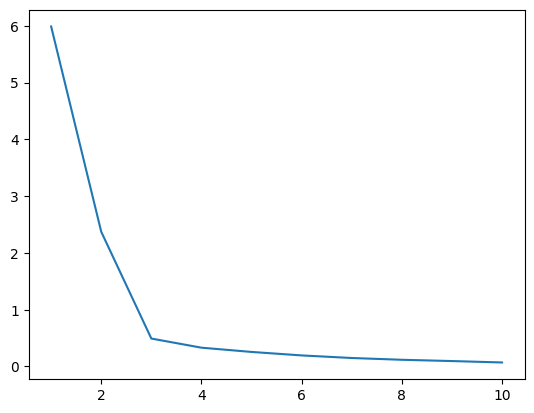

In [50]:
plt.plot(range(1,11),wcss)

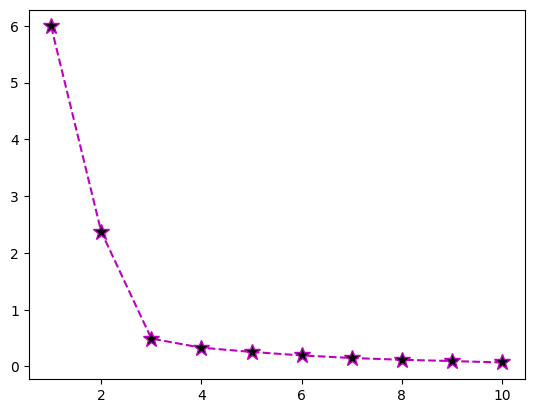

In [51]:
plt.plot(range(1,11),wcss,linestyle='--',marker='*',color='m',
         markerfacecolor='k',ms=12)

In [52]:
from sklearn.metrics import silhouette_score

In [53]:
X[:3]

,Age,Income
0,0.058824,0.208333
1,0.176471,0.375000
2,0.176471,0.133333


In [54]:
new = KMeans(n_clusters=3)

In [55]:
new.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [56]:
y_pred = new.labels_
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2,
       1, 0], dtype=int32)

In [57]:
silhouette_score(X,y_pred)

0.7261322509367406

In [58]:
for i in [2,3,4,5,6]:
  km = KMeans(n_clusters=i)
  km.fit(X)
  s_score = silhouette_score(X,km.labels_)
  print('Cluster:',i,'SilhouetteScore:',s_score)

Cluster: 2 SilhouetteScore: 0.5371159667908988
Cluster: 3 SilhouetteScore: 0.7261322509367406
Cluster: 4 SilhouetteScore: 0.6919228048185123
Cluster: 5 SilhouetteScore: 0.5989901496296245
Cluster: 6 SilhouetteScore: 0.49456808053923745


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [59]:
for i in [2,3,4,5,6]:
    km = KMeans(n_clusters=i)
    km.fit(X)
    s_score = silhouette_score(X,km.labels_)
    if s_score > 0.7:
        print('Cluster:',i,'SilhouetteScore:',s_score)

Cluster: 3 SilhouetteScore: 0.7261322509367406


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [60]:
X.to_csv('scaled_data.csv',index=False)